In [1]:
### SIMULATED_BNS_LAMBDARECOVERY.IPYNB -- recover bimodal Lambda posterior from simulated BNS population

In [2]:
# load packages

import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
# user input

SCENARIO = 'O5' # O4, O5, 3G
SCENARIOTAG = 'y2' # can add y2, d1 tags to make O5y2 or 3Gd1

mbins = np.linspace(1.,2.3,14)

/home/philippe.landry/.local/lib/python3.7/site-packages/seaborn/distributions.py:434: UserWarning: No contour levels were found within the data range.
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


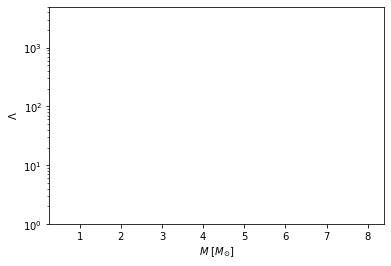

In [4]:
containerm1 = [None]*len(mbins)
containerm2 = [None]*len(mbins)
containerL1 = [None]*len(mbins)
containerL2 = [None]*len(mbins)
containerm = [None]*len(mbins)
containerL = [None]*len(mbins)
for j in range(len(mbins)):
    containerm[j], containerL[j] = [], []
    
npop = {'O4': 3, 'O5': 10, 'O5y2': 18, '3Gw1': 112, '3Gm1': 485, '3G': 300000}[SCENARIO+SCENARIOTAG] # number of detected events in population

for i in range(npop):
    
    data = np.genfromtxt('./dat/{1}_unif_BNS_DBHF2010/BNS_{0}.csv'.format(i,SCENARIO+SCENARIOTAG),names=True,dtype=None,delimiter=',')
    
    m1s = data['m1']
    m2s = data['m2']
    L1s = data['Lambda1']
    L2s = data['Lambda2']
    
    for j in range(len(mbins)):
    
        containerm1[j] = m1s[np.where(np.digitize([np.median(m1s)]*len(m1s),mbins)==j)]
        containerm2[j] = m2s[np.where(np.digitize([np.median(m2s)]*len(m1s),mbins)==j)]
        containerm[j] += list(containerm1[j]) + list(containerm2[j])
    
        containerL1[j] = L1s[np.where(np.digitize([np.median(m1s)]*len(m1s),mbins)==j)]
        containerL2[j] = L2s[np.where(np.digitize([np.median(m2s)]*len(m1s),mbins)==j)]
        containerL[j] += list(containerL1[j]) + list(containerL2[j])
    
    sns.kdeplot(m1s,L1s,color='k',levels=[0.1,0.5])
    sns.kdeplot(m2s,L2s,color='k',levels=[0.1,0.5])

plt.yscale('log')
plt.ylim(1.,5e3)

plt.xlabel(r'$M$ [$M_\mathrm{\odot}$]')
plt.ylabel(r'$\Lambda$')
plt.show()

bin up to 1.0 Msun; 1.0 stars in bin


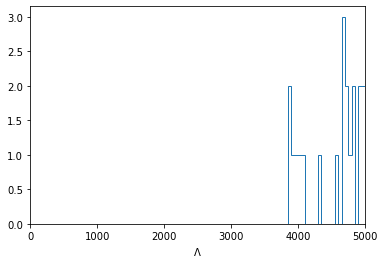

bin up to 1.1 Msun; 1.0 stars in bin


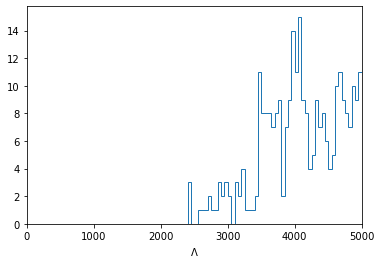

bin up to 1.2 Msun; 3.0 stars in bin


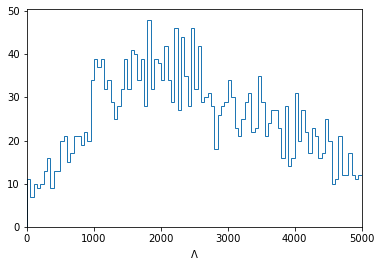

bin up to 1.3 Msun; 4.0 stars in bin


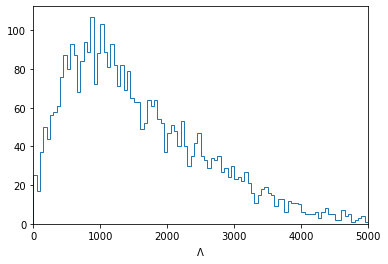

bin up to 1.4 Msun; 5.0 stars in bin


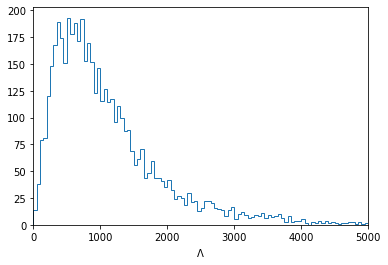

bin up to 1.5 Msun; 4.0 stars in bin


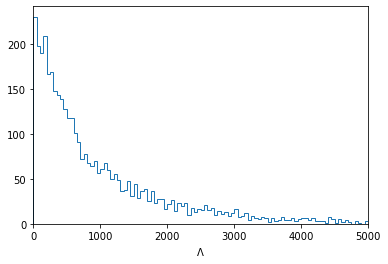

bin up to 1.6 Msun; 2.0 stars in bin


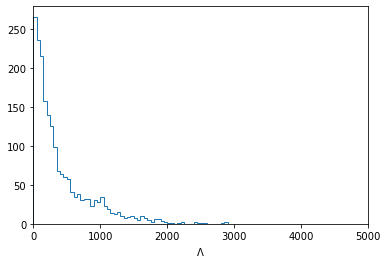

bin up to 1.7 Msun; 3.0 stars in bin


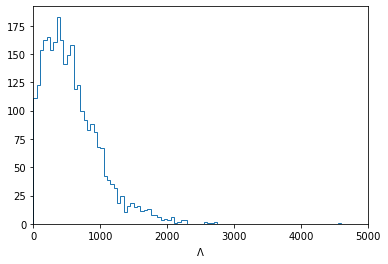

bin up to 1.7999999999999998 Msun; 3.0 stars in bin


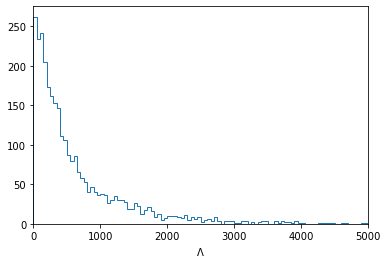

bin up to 1.9 Msun; 4.0 stars in bin


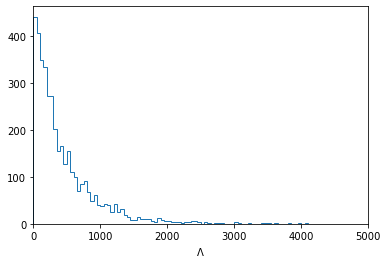

bin up to 2.0 Msun; 3.0 stars in bin


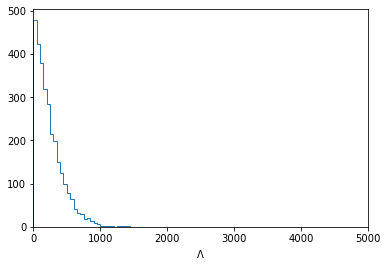

bin up to 2.0999999999999996 Msun; 3.0 stars in bin


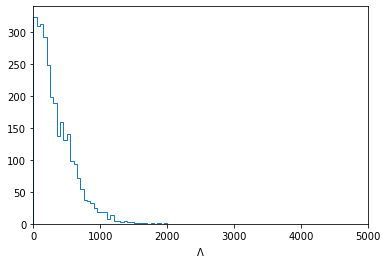

bin up to 2.2 Msun; 0.0 stars in bin


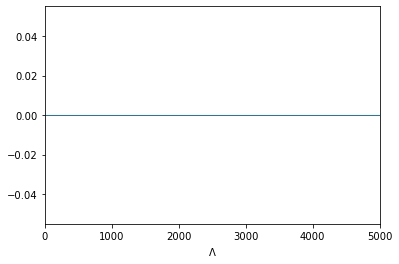

bin up to 2.3 Msun; 0.0 stars in bin


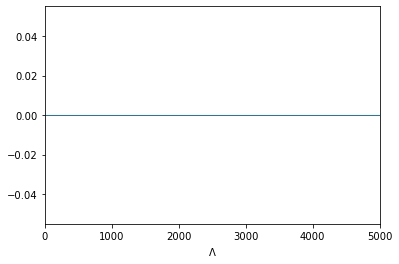

In [5]:
for j in range(len(mbins)):
    
    print('bin up to {0} Msun;'.format(mbins[j]),'{0} stars in bin'.format(len(containerL[j])/1000))
    plt.hist(containerL[j],bins=100,range=(0.,5000.),histtype='step')
    
    plt.xlim(0.,5000.)
    plt.xlabel(r'$\Lambda$')
    plt.show()